In [1]:
# Useful libraries
import numpy as np
import scipy.linalg as sla
from sklearn import model_selection

import matplotlib.pyplot as plt
%matplotlib inline

import math

# Лабораторная работа 2

## Линейная регрессия

### Метод наименьших квадратов: постановка задачи

Рассмотрим систему уравнений $Xa = y$, в которой $a$ --- столбец неизвестных. Её можно переписать в векторном виде
$$x_1 a_1 + x_2 a_2 + \ldots + x_k a_k = y,$$
где $x_1,\ldots,x_n$ --- столбцы матрицы $X$. Таким образом, решить исходную систему означает найти линейную комбинацию векторов $x_1,\ldots,x_n$, равную правой части. Но что делать, если такой линейной комбинации не существует? Геометрически это означает, что вектор $y$ не лежит в подпространстве $U = \langle x_1,\ldots, x_k\rangle$. В этом случае мы можем найти *псевдорешение*: вектор коэффициентов $\hat{a}$, для которого линейная комбинация $x_1 \hat{a}_1 + x_2 \hat{a}_2 + \ldots + x_k \hat{a}_k$ хоть и не равна в точности $y$, но является наилучшим приближением --- то есть ближайшей к $y$ точкой $\hat{y}$ подпространства $U$ (иными словами, ортогональной проекцией $y$ на это подпростанство). Итак, цель наших исканий можно сформулировать двумя эквивалентными способами:

1. Найти вектор $\hat{a}$, для которого длина разности $|X\hat{a} - y|$ минимальна (отсюда название "метод наименьших квадратов");
2. Найти ортогональную проекцию $\hat{y}$ вектора $y$ на подпространство $U$ и представить её в виде $X\hat{a}$.

Далее мы будем предполагать, что векторы $x_1,\ldots,x_n$ линейно независимы (если нет, то сначала имеет смысл выделить максимальную линейно независимую подсистему).

На лекциях было показано, что проекция вектора $y$ на подпространство $U = \langle x_1,\ldots, x_k\rangle$, записывается в виде
$$\hat{y} = X\left(X^TX\right)^{-1}X^Ty,$$
и, соответственно, искомый вектор $\hat{a}$ равен
$$\hat{a} = \left(X^TX\right)^{-1}X^Ty.$$

### Задача линейной регрессии

Начнём с примера. Допустим, вы хотите найти зависимость среднего балла S студента ФКН от его роста H, веса W, длины волос L и N - количества часов, которые он ежедневно посвящает учёбе. Представьте, что мы измерили все эти параметры для $n$ студентов и получили наборы значений: $S_1,\ldots, S_n$, $H_1,\ldots, H_n$ и так далее.

Тут можно подбирать много разных умных моделей, но начать имеет смысл с самой простой, линейной:
$$S = a_1H + a_2W + a_3L + a_4N + a_5.$$
Конечно, строгой линейной зависимости нет (иначе можно было бы радостно упразднить экзамены), но мы можем попробовать подобрать коэффициенты $a_1, a_2, a_3, a_4, a_5$, для которых отклонение правой части от наблюдаемых было бы наименьшим:
$$\sum_{i=1}^n\left(S_i - ( a_1H_i + a_2W_i + a_3L_i + a_4N_i + a_5)\right)^2 \longrightarrow \min$$
И сразу видно, что мы получили задачу на метод наименьших квадратов! А именно, у нас
$$X =
\begin{pmatrix}
H_1 & W_1 & L_1 & N_1 & 1\\
H_2 & W_2 & L_2 & N_2 & 1\\
\dots & \dots & \dots & \dots & \dots \\
H_n & W_n & L_n & N_n & 1
\end{pmatrix},\qquad y=
\begin{pmatrix}
S_1\\ S_2\\ \vdots \\ S_n
\end{pmatrix}$$

Решая эту задачу с помощью уже известных формул, получаем оценки коэффициентов $\hat{a}_i$ ($i = 1\ldots,5$).

Теперь проговорим общую постановку задачи линейной регрессии. У нас есть $k$ переменных $x_1,\ldots,x_k$ ("регрессоров"), через которые мы хотим выразить "объясняемую переменную" $y$:
$$y = a_1x_1 + a_2x_2 + \ldots + a_kx_k$$
Значения всех переменных мы измерили $n$ раз (у $n$ различных объектов,  в $n$ различных моментов времени - это зависит от задачи). Подставим эти данные в предыдущее равенство:
$$\begin{pmatrix}
y_1\\ y_2 \\ \vdots \\ y_n
\end{pmatrix} = 
a_1\begin{pmatrix}
x_{11} \\ x_{21} \\ \vdots \\ x_{n1} \end{pmatrix} + a_2\begin{pmatrix}
x_{12} \\ x_{22} \\ \vdots \\ x_{n2} \end{pmatrix} + \ldots + a_k\begin{pmatrix}
x_{1k} \\ x_{2k} \\ \vdots \\ x_{nk} \end{pmatrix}$$
(здесь $x_{ij}$ - это значение $j$-го признака на $i$-м измерении). Это удобно переписать в матричном виде:
$$\begin{pmatrix}
x_{11} & x_{12} & \ldots & x_{1k}\\
x_{21} & x_{22} & \ldots & x_{2k}\\
\dots & \dots & \dots & \dots\\
x_{n1} & x_{n2} & \ldots & x_{nk}
\end{pmatrix} \cdot
\begin{pmatrix}
a_1 \\ a_2 \\ \vdots \\ a_k
\end{pmatrix} = 
\begin{pmatrix}
y_1 \\ y_2 \\ \vdots \\ y_n
\end{pmatrix}$$
или коротко $Xa = y$. Поскольку на практике эта система уравнений зачастую не имеет решения (ибо зависимости в жизни редко бывают действительно линейными), методом наименьших квадратов ищется псевдорешение.

### Оценка качества. Обобщающая способность. Обучение и тест 

После того, как вы построили регрессию и получили какую-то зависимость объясняемой переменной от регрессоров, настаёт время оценить качество регрессии. Есть много разных функционалов качества; мы пока будем говорить только о самом простом и очевидном из них: о среднеквадратичной ошибке (mean square error). Она равна
$$\frac1{n}|X\hat{a} - y|^2 = \frac1{n}\sum_{i=1}^n\left(\hat{a}_1x_{i1} + \hat{a}_2x_{i2} + \ldots + \hat{a}_kx_{ik} - y_i\right)^2$$

В целом, хочется искать модели с наименьшей mean square error на имеющихся данных. Однако слишком фанатичная гонка за минимизацией ошибки может привести к печальным последствиям. Например, если мы приближаем функцию одной переменной по значениям в $n$ точках, то наилучшей с точки зрения этой ошибки моделью будет многочлен $(n-1)$-й степени, для которого эта ошибка будет равна нулю.  Тем не менее, вряд ли истинная зависимость имеет вид многочлена большой степени. Более того, значения вам скорее всего даны с погрешностью, то есть вы подогнали вашу модель под свои зашумлённые данные, но на любых других данных (то есть в других точках) точность, скорее всего, окажется совсем не такой хорошей. Этот эффект называют **переобучением**; говорят также, что **обобщающая способность** модели оказалась скверной.

Чтобы не попадать в эту ловушку, данные обычно делят на обучающие (по которым строят модель и оценивают коэффициенты) и тестовые. Лучшей стоит счесть ту модель, для которой значение функционала качества будет меньше.

### Задание 1. Метод наименьших квадратов (4 балла)

Скачайте файлы ``train.txt`` и ``test.txt``. В первом из них находится обучающая выборка, а во втором - тестовая. Каждый из файлов содержит два столбца чисел, разделённых пробелами: в первом - $n$ точек (значения аргумента $x$), во втором - значения некоторой функции $y = f(x)$ в этих точках, искажённые случайным шумом. Ваша задача - по обучающей выборке подобрать функцию $y = g(x)$, пристойно приближающую неизвестную вам зависимость.

Загрузим обучающие и тестовые данные (не забудьте ввести правильный путь!).

In [2]:
# Load info
data_train = np.loadtxt('train.txt', delimiter=',')
data_test = np.loadtxt('test.txt', delimiter=',')

Разделим значения $x$ и $y$

In [3]:
# Division
X_train = data_train[:,0]
Y_train = data_train[:,1]

X_test = data_test[:,0]
Y_test = data_test[:,1]

Найдите с помощью метода наименьших квадратов линейную функцию ($y = kx + b$), наилучшим образом приближающую неизвестную зависимость. Полезные функции: ``numpy.ones(n)`` для создания массива из единиц длины $n$ и ``numpy.concatenate((А, В), axis=1)`` для слияния двух матриц по столбцам (пара ``А`` и ``В`` превращается в матрицу ``[A B]``).

In [4]:
# Size of data_train
n = len(X_train)

# Data matrix = data
data = np.concatenate((X_train.reshape(n, 1), np.ones(n).reshape(n, 1)), axis=1)
c = np.dot(np.dot(sla.inv(np.dot(data.T, data)), data.T), Y_train.reshape(n, 1))

# Output
print('f(x) =', c[0][0], 'x +', c[1][0])

f(x) = 2.27913449805 x + 4.43323090506


Нарисуйте на плоскости точки $(x_i, y_i)$ и полученную линейную функцию. Глядя на данные, подумайте, многочленом какой степени можно было бы лучше всего приблизить эту функцию. Найдите этот многочлен и нарисуйте его график.

In [5]:
# k = power
# r = result
# c = coefficients
# d = data
# Y = Y_train || Y_test
# X = X_train || X_test

def make_data(k, X):
    r = np.ones((n, k + 1))
    for i in range(n):
        for j in range(k):
            r[i][j] = X[i] ** (k - j)
    return r
            
def make_c(k):
    d = make_data(k, X_train)
    return np.dot(np.dot(sla.inv(np.dot(d.T, d)), d.T), Y_train.reshape(n, 1))

def error(c, Y, data):
    r = 0
    Y1 = np.dot(data, c)
    
    for i in range(n):
        r += (Y1[i] - Y[i]) ** 2
    r /= n
    return r[0]

def f(c, x):
    r = 0
    power = len(c)
    for i in range(power):
        r += c[power - i - 1] * x ** i
    return r[0]

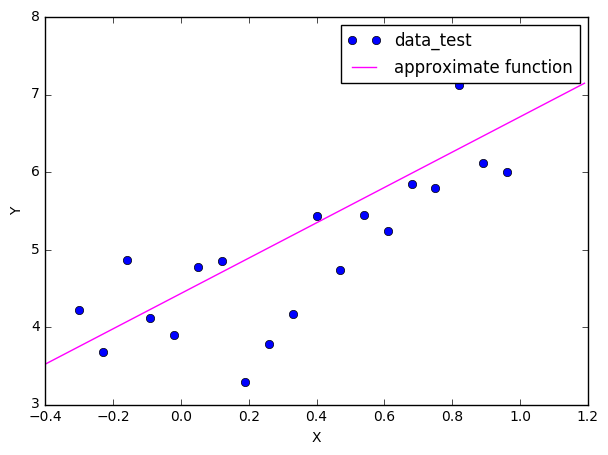

In [6]:
# Output
plt.figure(figsize=(7, 5))
plt.ylabel('Y')
plt.xlabel('X')
plt.ylim([3, 8])
plt.plot(X_test, Y_test, 'ro', color='blue', label='data_test')

c = make_c(1)
x = np.arange(-0.4, 1.2, 0.01)
y = [f(c, i) for i in x]
plt.plot(x, y, color='magenta', label='approximate function')
plt.legend()

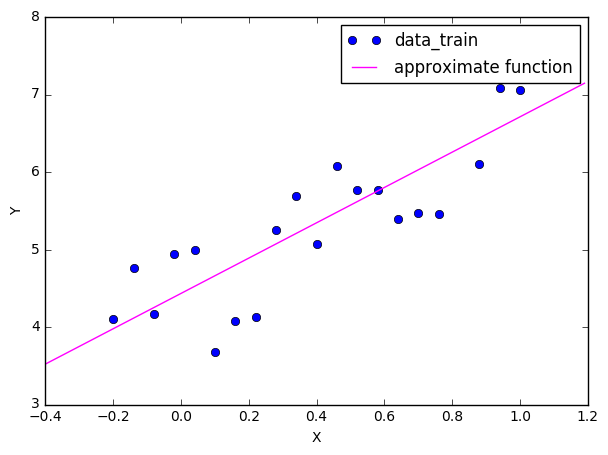

In [7]:
# Output
plt.figure(figsize=(7, 5))
plt.ylabel('Y')
plt.xlabel('X')
plt.ylim([3, 8])
plt.plot(X_train, Y_train, 'ro', color='blue', label='data_train')

c = make_c(1)
x = np.arange(-0.4, 1.2, 0.01)
y = [f(c, i) for i in x]
plt.plot(x, y, color='magenta', label='approximate function')
plt.legend()

На данный момент сложно предположить, многочлен какой степени лучше всего подходит к нашему графику. Однако, если посмотреть на выколотки ниже, минимальная ошибка на тестовых данных достигается на многочлене степени 3. Найдем коэффиценты этого многочлена и построим наш график.

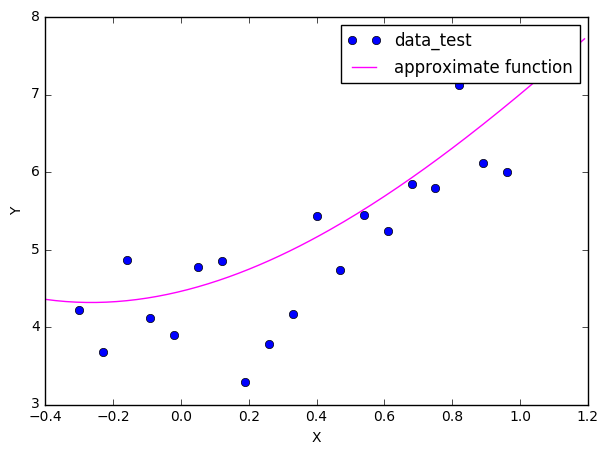

In [8]:
# Output
plt.figure(figsize=(7, 5))
plt.ylabel('Y')
plt.xlabel('X')
plt.ylim([3, 8])
plt.plot(X_test, Y_test, 'ro', color='blue', label='data_test')

c = make_c(3)
x = np.arange(-0.4, 1.2, 0.01)
y = [f(c, i) for i in x]
plt.plot(x, y, color='magenta', label='approximate function')
plt.legend()

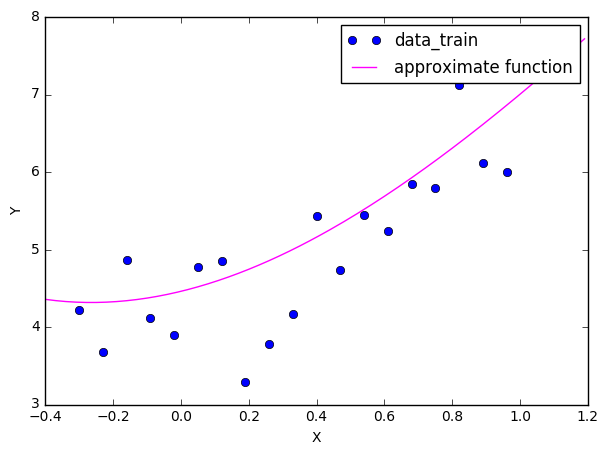

In [9]:
# Output
plt.figure(figsize=(7, 5))
plt.ylabel('Y')
plt.xlabel('X')
plt.ylim([3, 8])
plt.plot(X_test, Y_test, 'ro', color='blue', label='data_train')

c = make_c(3)
x = np.arange(-0.4, 1.2, 0.01)
y = [f(c, i) for i in x]
plt.plot(x, y, color='magenta', label='approximate function')
plt.legend()

In [10]:
print('f(x) = ', c[0][0], 'x^3 + ', c[1][0], 'x^2 + ', c[2][0], 'x + ', c[3][0], sep='')

f(x) = -0.381768604288x^3 + 1.85975083726x^2 + 1.06501610529x + 4.46073635529


In [11]:
print('Mean square error for test data is :', error(make_c(3), Y_test, make_data(3, X_test)))
# For task 3
error_3 = error(make_c(3), Y_test, make_data(3, X_test))

Mean square error for test data is : 0.355346457152


Для $k = 1,2,3,\ldots,10$ найдите многочлен $\hat{f}_k$ степени $k$, наилучшим образом приближающий неизвестную зависимость. Для каждого из них найдите среднеквадратическую ошибку на обучающих данных и на тестовых данных: $\frac1{n}\sum_{i=1}^n\left( \hat{f}_k(x_i) - y_i \right)^2$ (в первом случае сумма ведётся по парам $(x_i, y_i)$ из обучающих данных, а во втором - по парам из тестовых данных).

Для $k = 1,2,3,4,6$ напечатайте коэффициенты полученных многочленов и нарисуйте их графики на одном чертеже вместе с точками $(x_i, y_i)$ (возможно, график стоит сделать побольше; это делается командой `plt.figure(figsize=(width, height))`).

In [12]:
# Output error
print('Mean square error:\n')
for k in range(1, 11):
    print("power = ", k,
          "\t train data: ", error(make_c(k), Y_train, make_data(k, X_train)),
          "\t test data: ", error(make_c(k), Y_test, make_data(k, X_test)), sep="")

Mean square error:

power = 1	 train data: 0.296896633263	 test data: 0.435120200405
power = 2	 train data: 0.269698915877	 test data: 0.356476288783
power = 3	 train data: 0.269497187148	 test data: 0.355346457152
power = 4	 train data: 0.261066533058	 test data: 0.44172701893
power = 5	 train data: 0.249985046483	 test data: 0.557973202215
power = 6	 train data: 0.188293489884	 test data: 2.58169293299
power = 7	 train data: 0.185396211533	 test data: 2.5157829022
power = 8	 train data: 0.159055565791	 test data: 4.35728925936
power = 9	 train data: 0.158471842931	 test data: 4.77626204582
power = 10	 train data: 0.153166110555	 test data: 14.6321750275


In [13]:
# For 3 task
error_6 = error(make_c(6), Y_test, make_data(6, X_test))
error_6

2.5816929329894762

power = 1 [2.27913, 4.43323]
power = 2 [1.40163, 1.15783, 4.47248]
power = 3 [-0.38177, 1.85975, 1.06502, 4.46074]
power = 4 [7.91847, -13.05133, 6.79409, 1.1718, 4.34117]
power = 6 [-229.97013, 581.4533, -481.51013, 121.2571, 16.0029, -4.59718, 4.3838]


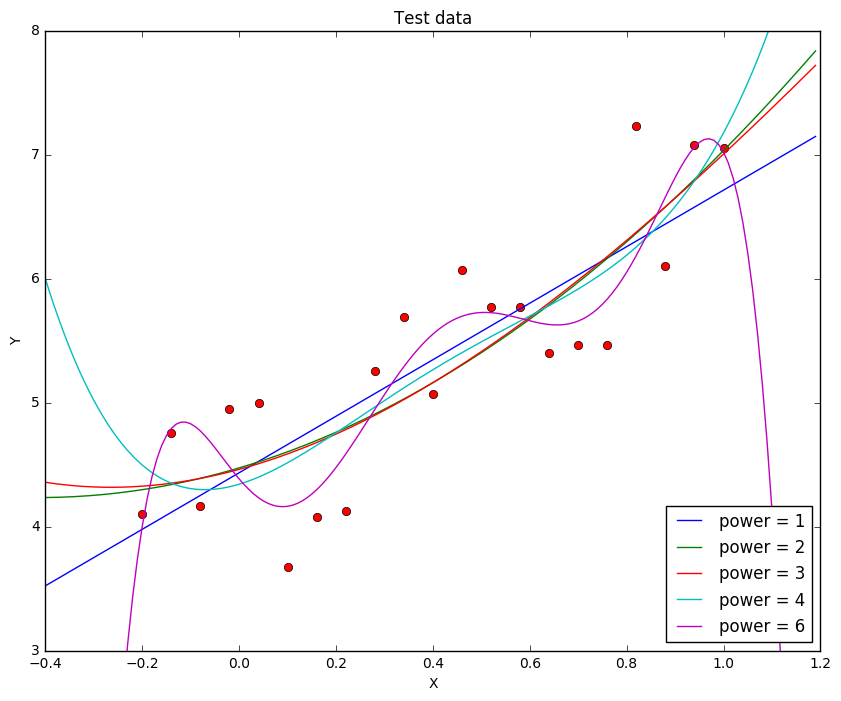

In [14]:
# Output
plt.figure(figsize=(10, 8))
plt.title('Test data')
plt.ylabel('Y')
plt.xlabel('X')
plt.ylim([3, 8])
plt.plot(X_train, Y_train, 'ro')
# My legend = ml
ml = []

for k in range(1, 7):
    if k != 5:
        c = make_c(k)
        x = np.arange(-0.4, 1.2, 0.01)
        y = [f(c, i) for i in x]
        
        legend_k, = plt.plot(x, y, label='power = ' + str(k))
        ml.append(legend_k)

        print("power = " + str(k), [round(x, 5) for x in c[:, 0].tolist()])

plt.legend(handles=ml, loc=4)

Что происходит с ошибкой при росте степени многочлена? Казалось бы, чем больше степень, тем более сложным будет многочлен и тем лучше он будет приближать нашу функцию. Подтверждают ли это ваши наблюдения? Как вам кажется, чем объясняется поведение ошибки на тестовых данных при $k = 10$?

С ростом степени наша зависимость все точнее приближается к обучающей выборке, происходит явление переобучения. Так например для степени $ len(X_{test}) $ наша ошибка вообще будет равна 0, так как многочлен будет проходить через все обучающие точки. На самом деле, зависимость является более слабой, как мы отметили - кубической, и значения функции начинают сильно разниться с действительностью под влиянием больших стрепеней, поэтому мы и имеем такую большую ошибку на тестовой выборке и такую маленькую - на тренировочной.

### Задание 2. Линейная регрессия (4 балла)

Скачайте файлы ``flats_moscow_mod.txt`` и ``flats_moscow_description.txt``. В первом из них содержатся данные о квартирах в Москве. Каждая строка содержит шесть характеристик некоторой квартиры, разделённые знаками табуляции; в первой строке записаны кодовые названия характеристик. Во втором файле приведены краткие описания признаков. Вашей задачей будет построить с помощью метода наименьших квадратов (линейную) зависимость между ценой квартиры и остальными доступными параметрами.

С помощью известных вам формул найдите регрессионные коэффициенты. Какой смысл имеют их знаки? Согласуются ли они с вашими представлениями о жизни?

Оцените качество приближения, вычислив среднеквадратическую ошибку.

In [15]:
# Load info
flats_info = np.loadtxt('flats_moscow_mod.txt', delimiter='\t', skiprows=1)
Y = flats_info[:,0]
X = flats_info[:, 1:]
n = len(X)
m = len(X[0, :])

# Make data and coefficients
data = np.concatenate((X, np.ones(n).reshape(n, 1)), axis=1)
c = np.dot(np.dot(sla.inv(np.dot(data.T, data)), data.T), Y.reshape(n, 1))

# Mean square error = result = r
r = 0
Y1 = np.dot(data, c)
for i in range(n):
    r += (Y1[i] - Y[i]) ** 2
r /= n

print("Mean square error :", r[0])
print("Regression coefficients :")
print("\t totsp : \t", c[0][0])
print("\t livesp : \t", c[1][0])
print("\t kitsp : \t", c[2][0])
print("\t dist : \t", c[3][0])
print("\t metrdist : \t", c[4][0])

Mean square error : 924.009003208
Regression coefficients :
	 totsp : 	 1.48705288613
	 livesp : 	 1.65628900123
	 kitsp : 	 1.81920497927
	 dist : 	 -3.32715405627
	 metrdist : 	 -1.3156886037


Отметим, что если коэффицент положителен, то с ростом данного параметра цена увеличивается, и, все наоборот, с отрицательным. Что касается полученных данных, то логично, что чем больше площадь квартиры, тем дороже она. Так же такие факторы как расстояние до чего-либо сказываются в негативную сторону, так как чем они больше, тем человеку не удобнее, а следовательно и цена - ниже. 

### Усложнение модели

Конечно, никто не гарантирует, что объясняемая переменная (цена квартиры) зависит от остальных характеристик именно линейно. Зависимость может быть, например, квадратичной или логарифмической; больше того, могут быть важны не только отдельные признаки, но и их комбинации. Это можно учитывать, добавляя в качестве дополнительных признаков разные функции от уже имеющихся характеристик: их квадраты, логарифмы, попарные произведения.

В этом задании вам нужно постараться улучшить качество модели, добавляя дополнительные признаки, являющиеся функциями от уже имеющихся. Но будьте осторожны: чрезмерное усложнение модели будет приводить к переобучению. 

**Сравнение моделей**

Когда вы построите новую модель, вам захочется понять, лучше она или хуже, чем изначальная. Проверять это на той же выборке, на которой вы обучались, бессмысленно и даже вредно (вспомните пример с многочленами: как прекрасно падала ошибка на обучающей выборке с ростом степени!). Поэтому вам нужно будет разделить выборку на обучающую и тестовую. Делать это лучше случайным образом (ведь вы не знаете, как создатели датасета упорядочили объекты); рекомендуем вам для этого функцию `sklearn.model_selection.train_test_split`.

In [16]:
# Data division
data_train, data_test = model_selection.train_test_split(flats_info, test_size=0.5, random_state=42)
Y_train = data_train[:,0]
X_train = data_train[:, 1:]

Y_test = data_test[:,0]
X_test = data_test[:, 1:]

# Shape of data
n = len(X_test)
m = len(X_test[0])

In [17]:
# The first part || Make_square_data = msd
def msd(X):
    return np.concatenate((X, X ** 2, np.ones((n, 1))), axis=1)

data = msd(X_train)
c = np.dot(np.dot(sla.inv(np.dot(data.T, data)), data.T), Y_train.reshape(n, 1))
r = error(c, Y_test, msd(X_test))
print("Mean square error :", r)

Mean square error : 830.391407989


In [18]:
# The second part || Make_log_data = mld
def mld(X):
    return np.concatenate((X, np.log(X), np.ones((n, 1))), axis = 1)

data = mld(X_train)
c = np.dot(np.dot(sla.inv(np.dot(data.T, data)), data.T), Y_train.reshape(n, 1))
r = error(c, Y_test, mld(X_test))
print("Mean square error :", r)

Mean square error : 872.378341015


In [19]:
# The third part || Make_pair_data = mpd
def mpd(X):
    r = np.ones((n, (m * (m + 1)) // 2  + 1))
    for i in range(n):
        fill_cell = 0
        for j in range(m):
            r[i][j] = X[i][j]
            for k in range(j + 1, m):
                r[i][m + fill_cell] = X[i][j] * X[i][k]
                fill_cell += 1
    return r
        
data = mpd(X_train)
c = np.dot(np.dot(sla.inv(np.dot(data.T, data)), data.T), Y_train.reshape(n, 1))
r = error(c, Y_test, mpd(X_test))
print("Mean square error :", r)

Mean square error : 906.916772663


### Задание 3. Регуляризация (2 балла)

Вспомним, что задача линейной регрессии формулируется как задача нахождения проекции вектора значений объясняемой переменной $y$ на линейную оболочку $\langle x_1,\ldots,x_k\rangle$ векторов значений регрессоров. Если векторы $x_1,\ldots,x_k$ линейно зависимы, то матрица $X^TX$ вырожденна и задача не будет решаться (то есть будет, но не с помощью приведённой выше формулы). В жизни, по счастью, различные признаки редко бывают *в точности* линейно зависимы, однако во многих ситуациях они скоррелированы и становятся "почти" линейно зависимыми. Таковы, к примеру, зарплата человека, его уровень образования, цена машины и суммарная площадь недвижимости, которой он владеет. В этом случае матрица $X^TX$ будет близка к вырожденной, и это приводит к численной неустойчивости и плохому качеству решений; как следствие, будет иметь место переобучение. Один из симптомов этой проблемы - необычно большие по модулю компоненты вектора $a$.

Есть много способов борьбы с этим злом. Один из них - регуляризация. Сейчас мы рассмотрим одну из её разновидностей --- L2-регуляризацию. Идея в том, чтобы подправить матрицу $X^TX$, сделав её "получше". Например, это можно сделать, заменив её на $(X^TX + \lambda E)$, где $\lambda$ --- некоторый скаляр. Пожертвовав точностью на обучающей выборке, мы тем не менее получаем численно более стабильное псевдорешение $a = (X^TX + \lambda E)^{-1}X^Ty$ и снижаем эффект переобучения. Параметр $\lambda$ нужно подбирать, и каких-то универсальных способов это делать нет, но зачастую можно его подобрать таким, чтобы ошибка на тестовой выборке падала. 

Теперь давайте вспомним первую задачу. Если вы её сделали, то помните, что ошибка аппроксимации многочленом шестой степени довольно высокая. Убедитесь, что, используя регуляризацию с хорошо подобранным коэффициентом $\lambda$, ошибку на тестовой выборке можно сделать не больше, чем для многочлена оптимальной степени в модели без регрессии. Для этого $\lambda$ сравните $\det(X^TX)$ и $\det(X^TX + \lambda E)$.

In [20]:
# Load info
data_train = np.loadtxt('train.txt', delimiter=',')
data_test = np.loadtxt('test.txt', delimiter=',')

# Division
X_train = data_train[:,0]
Y_train = data_train[:,1]

X_test = data_test[:,0]
Y_test = data_test[:,1]

# Size of data_train
n = len(X_train)

# Data matrix = data
data = np.concatenate((X_train.reshape(n, 1), np.ones(n).reshape(n, 1)), axis=1)
c = np.dot(np.dot(sla.inv(np.dot(data.T, data)), data.T), Y_train.reshape(n, 1))

In [21]:
# Optimal polinomial = 3
# Error with polinomial-3 = error_3
# Labmda = l
l = 0
min = error_6
for x in np.arange(1, 2, 0.001):
    data = make_data(6, X_train)
    c = np.dot(np.dot(sla.inv(np.dot(data.T, data) + x * np.identity(len(data[0, :]))), data.T), Y_train.reshape(n, 1))
    r = error(c, Y_test, make_data(6, X_test))
    if (r <= min):
        min = r
    if (min <= error_3):
        l = x
        print('Lambda :', l, ' Mean square error :', r, '< Mean square error-3 :', error_3)
        break   

Lambda : 1.0  Mean square error : 0.308219923571 < Mean square error-3 : 0.355346457152


In [22]:
# Comparison with det
data = make_data(6, X_train)
print('det(X^T * X) :', np.linalg.det(np.dot(data.T,  data)))
print('det(X^T * X + lambda * E) :', np.linalg.det(np.dot(data.T,  data) + l * np.identity(len(data[0, :]))))
print('Lambda :', l)

det(X^T * X) : 9.08286483864e-12
det(X^T * X + lambda * E) : 509.216450794
Lambda : 1.0


Нарисуйте на одном чертеже графики многочленов шестой степени, приближающих неизвестную функцию, для модели с регуляризацией и без. Чем первый из них выгодно отличается от второго?

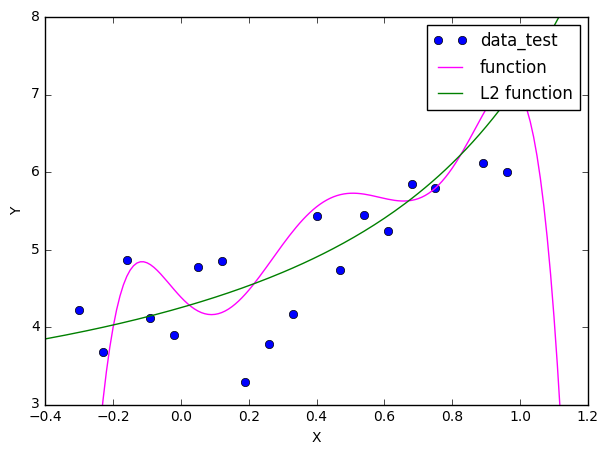

In [23]:
# Output
plt.figure(figsize=(7, 5))
plt.ylabel('Y')
plt.xlabel('X')
plt.ylim([3, 8])
plt.plot(X_test, Y_test, 'ro', color='blue', label='data_test')

c = make_c(6)
x = np.arange(-0.4, 1.2, 0.01)
y = [f(c, i) for i in x]
plt.plot(x, y, color='magenta', label='function')

data = make_data(6, X_train)
c = np.dot(np.dot(sla.inv(np.dot(data.T, data) + l * np.identity(len(data[0, :]))), data.T), Y_train.reshape(n, 1))
y = [f(c, i) for i in x]
plt.plot(x, y, color='green', label='L2 function')

plt.legend()

Попробуйте доказать, что вектор $a = (X^TX + \lambda E)^{-1}X^Ty$ является решением задачи

$$|Xa - y|^2 + \lambda|a|^2\rightarrow\min$$

Интуитивно это можно понимать так: мы ищем компромисс между минимизацией длины разности $|Xa - y|$ (то есть точностью решения задачи регрессии) и тем, чтобы компоненты вектора $a$ не становились слишком большими по модулю.

---

**Ваше решение**

$$
k =
\begin{pmatrix}
X \\
\sqrt{\lambda}E
\end{pmatrix}, 
\quad b = 
\begin{pmatrix}
Y \\
0
\end{pmatrix}
$$

Тогда решением задачи $ (ka - b) \to min $ является вектор
$$
a = (k^T k)^{-1} k^T y = \big (
\begin{pmatrix}
X & 
\sqrt{\lambda}E
\end{pmatrix}
\begin{pmatrix}
X \\
\sqrt{\lambda}E
\end{pmatrix}
\big )^{-1}
\begin{pmatrix}
X^T & 
\sqrt{\lambda}E
\end{pmatrix}
\begin{pmatrix}
y \\
0
\end{pmatrix} =
(X^T X + \lambda E)^{-1}X^Ty
$$

Заметим
$$
(ka - b)^2 \to min = \big (
\begin{pmatrix}
X \\
\sqrt{\lambda}E
\end{pmatrix}
a - 
\begin{pmatrix}
Y \\
0
\end{pmatrix}
\big )^2 =
\begin{pmatrix}
Xa - Y \\
\sqrt{\lambda}Ea
\end{pmatrix}^2 =
\begin{pmatrix}
(Xa - Y)^T &
\sqrt{\lambda}Ea^T
\end{pmatrix}
\begin{pmatrix}
Xa - Y \\
\sqrt{\lambda}Ea
\end{pmatrix} =
(Xa - Y)^T (Xa - Y) + 
\sqrt{\lambda}Ea^T a = 
(Xa - Y)^2 + \sqrt{\lambda}Ea^2 \to min
$$

Что в точности дает нам нашу задачу